# Predictive Maintenance - RUL - Turbofan Jet Engine

## Description

Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set includes Run-to-Failure simulated data from turbo fan jet engines.

Engine degradation simulation was carried out using C-MAPSS to simulate different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution

## New Section

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to: 1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
…
28) sensor measurement 23

## Objective

This machine learning project will be directed to provide a framework for predicting the aircraft’s Remaining Useful Life (RUL) based on the entire life cycle data in order to provide the necessary maintenance behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
para=['parameter ' + str(i) for i in range(1,4)]
sensor = ['sensor ' + str(i) for i in range(1,24)]

In [3]:
['Sl no.', 'cycles'].extend(para)

In [4]:
columns = ['Sl no.', 'cycles']
columns.extend(para)
columns.extend(sensor)
columns

['Sl no.',
 'cycles',
 'parameter 1',
 'parameter 2',
 'parameter 3',
 'sensor 1',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 5',
 'sensor 6',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 10',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 16',
 'sensor 17',
 'sensor 18',
 'sensor 19',
 'sensor 20',
 'sensor 21',
 'sensor 22',
 'sensor 23']

In [5]:
!gdown 1-pqM-jaqxI0XVzR_fOX1Msnpne-SZFSt
!gdown 1nimt5cAMGtQW508JC0uVJxjztsKhVU-9

Downloading...
From: https://drive.google.com/uc?id=1-pqM-jaqxI0XVzR_fOX1Msnpne-SZFSt
To: /content/train_FD001.txt
100% 3.52M/3.52M [00:00<00:00, 73.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nimt5cAMGtQW508JC0uVJxjztsKhVU-9
To: /content/test_FD001.txt
100% 2.23M/2.23M [00:00<00:00, 72.6MB/s]


In [6]:
df_train = pd.read_csv('train_FD001.txt', sep=' ', names=columns)
df_test = pd.read_csv('test_FD001.txt', sep=' ', names=columns)

In [7]:
df_train.shape

(20631, 28)

In [8]:
df_test.shape

(13096, 28)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sl no.       20631 non-null  int64  
 1   cycles       20631 non-null  int64  
 2   parameter 1  20631 non-null  float64
 3   parameter 2  20631 non-null  float64
 4   parameter 3  20631 non-null  float64
 5   sensor 1     20631 non-null  float64
 6   sensor 2     20631 non-null  float64
 7   sensor 3     20631 non-null  float64
 8   sensor 4     20631 non-null  float64
 9   sensor 5     20631 non-null  float64
 10  sensor 6     20631 non-null  float64
 11  sensor 7     20631 non-null  float64
 12  sensor 8     20631 non-null  float64
 13  sensor 9     20631 non-null  float64
 14  sensor 10    20631 non-null  float64
 15  sensor 11    20631 non-null  float64
 16  sensor 12    20631 non-null  float64
 17  sensor 13    20631 non-null  float64
 18  sensor 14    20631 non-null  float64
 19  sens

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sl no.       13096 non-null  int64  
 1   cycles       13096 non-null  int64  
 2   parameter 1  13096 non-null  float64
 3   parameter 2  13096 non-null  float64
 4   parameter 3  13096 non-null  float64
 5   sensor 1     13096 non-null  float64
 6   sensor 2     13096 non-null  float64
 7   sensor 3     13096 non-null  float64
 8   sensor 4     13096 non-null  float64
 9   sensor 5     13096 non-null  float64
 10  sensor 6     13096 non-null  float64
 11  sensor 7     13096 non-null  float64
 12  sensor 8     13096 non-null  float64
 13  sensor 9     13096 non-null  float64
 14  sensor 10    13096 non-null  float64
 15  sensor 11    13096 non-null  float64
 16  sensor 12    13096 non-null  float64
 17  sensor 13    13096 non-null  float64
 18  sensor 14    13096 non-null  float64
 19  sens

In [11]:
#Since sensor 22 and sensor 23 values are empty all through out, we can go ahead and drop these columns

df_train.drop(['sensor 22', 'sensor 23'], axis=1, inplace=True)
df_test.drop(['sensor 22', 'sensor 23'], axis=1, inplace=True)

In [12]:
df_train.nunique()

Sl no.          100
cycles          362
parameter 1     158
parameter 2      13
parameter 3       1
sensor 1          1
sensor 2        310
sensor 3       3012
sensor 4       4051
sensor 5          1
sensor 6          2
sensor 7        513
sensor 8         53
sensor 9       6403
sensor 10         1
sensor 11       159
sensor 12       427
sensor 13        56
sensor 14      6078
sensor 15      1918
sensor 16         1
sensor 17        13
sensor 18         1
sensor 19         1
sensor 20       120
sensor 21      4745
dtype: int64

In [13]:
#We will drop columns which are constant throughout the dataset.

df_train.drop(['parameter 3', 'sensor 1', 'sensor 5', 'sensor 6', 'sensor 10', 'sensor 16', 'sensor 18', 'sensor 19'], axis=1, inplace=True)
df_test.drop(['parameter 3', 'sensor 1' , 'sensor 5', 'sensor 6', 'sensor 10', 'sensor 16', 'sensor 18', 'sensor 19'], axis=1, inplace=True)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sl no.       20631 non-null  int64  
 1   cycles       20631 non-null  int64  
 2   parameter 1  20631 non-null  float64
 3   parameter 2  20631 non-null  float64
 4   sensor 2     20631 non-null  float64
 5   sensor 3     20631 non-null  float64
 6   sensor 4     20631 non-null  float64
 7   sensor 7     20631 non-null  float64
 8   sensor 8     20631 non-null  float64
 9   sensor 9     20631 non-null  float64
 10  sensor 11    20631 non-null  float64
 11  sensor 12    20631 non-null  float64
 12  sensor 13    20631 non-null  float64
 13  sensor 14    20631 non-null  float64
 14  sensor 15    20631 non-null  float64
 15  sensor 17    20631 non-null  int64  
 16  sensor 20    20631 non-null  float64
 17  sensor 21    20631 non-null  float64
dtypes: float64(15), int64(3)
memory usage: 2.8 MB


In [15]:
df_train.describe()

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


In [16]:
dft = df_train.groupby(by='Sl no.')['cycles'].max().reset_index()
dft.sort_values(by='cycles', ascending=False, inplace=True)

In [17]:
dft

,Sl no.,cycles
68,69,362
91,92,341
95,96,336
66,67,313
82,83,293
...,...,...
23,24,147
56,57,137
69,70,137
90,91,135


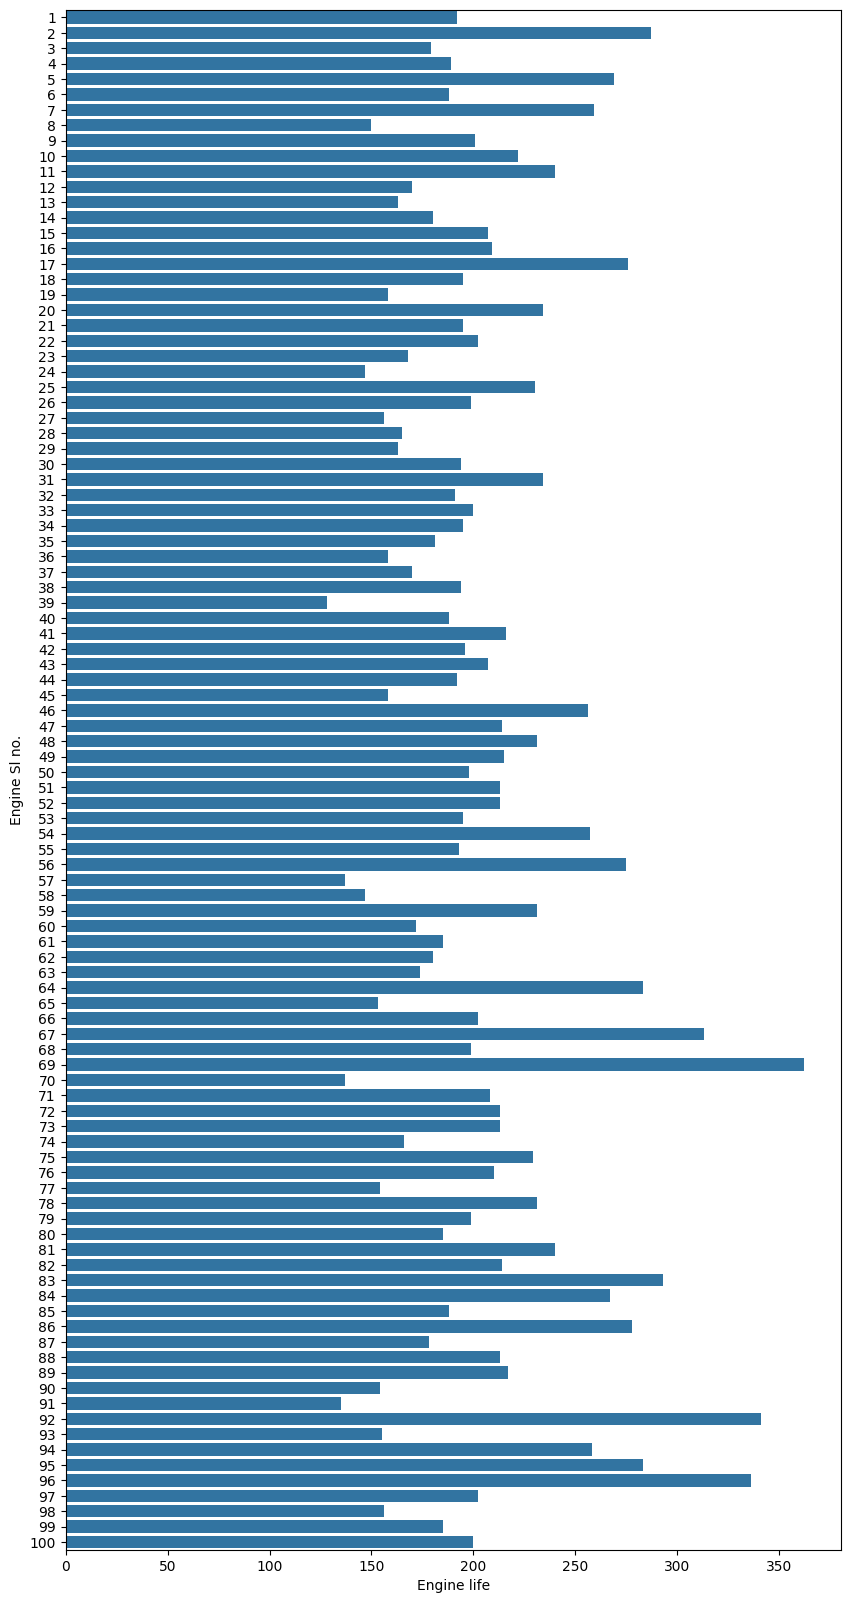

In [18]:
plt.figure(figsize=(10,20))
sns.barplot(data=dft, x='cycles', y='Sl no.', orient='h')
plt.xlabel('Engine life')
plt.ylabel('Engine Sl no.')
plt.show()

In [19]:
print('Max engine life:', dft['cycles'].max())
print('Min engine life:', dft['cycles'].min())

Max engine life: 362
Min engine life: 128


We have engines which lasted 362 cycles which is the max life that we got and 128 cycles as well which is the minimum life we got among 100 engines which operated in various operating conditions.

In [20]:
df_train['RUL']=df_train.groupby(by='Sl no.')['cycles'].transform(lambda x: x.max())-df_train['cycles']
df_test['RUL']=df_test.groupby(by='Sl no.')['cycles'].transform(lambda x: x.max())-df_test['cycles']

df_train['max_life'] = df_train.groupby(by='Sl no.')['cycles'].transform(lambda x: x.max())
df_test['max_life'] = df_test.groupby(by='Sl no.')['cycles'].transform(lambda x: x.max())

In [21]:
df_train.head()

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL,max_life
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192


## Creation of target variable for classification problem:

The target variable will indicate whether the engine needs service(1) or it doesn't(0). The target variable will become 1 once it covers 90 percent of it's life. This done inorder to prevent the breakdown which will consume much higher amount of time when compared with preventive maintenance or it could become a catastrophy if the function is critical like an aircraft engine.

In [22]:
df_train['target'] = df_train['RUL']<0.1*df_train['max_life']
df_test['target'] = df_test['RUL']<0.1*df_test['max_life']

In [23]:
df_train

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL,max_life,target
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,False
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,False
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,False
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,False
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,True
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,True
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,True
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,True


In [24]:
df_train['target'].value_counts()

False    18525
True      2106
Name: target, dtype: int64

In [25]:
df_test['target'].value_counts()

False    11738
True      1358
Name: target, dtype: int64

In [26]:
df_train[df_train['Sl no.']==1]['target'].value_counts()

False    172
True      20
Name: target, dtype: int64

In [27]:
df_train[df_train['Sl no.']==1]['target']

0      False
1      False
2      False
3      False
4      False
       ...  
187     True
188     True
189     True
190     True
191     True
Name: target, Length: 192, dtype: bool

In [28]:
df_train['target'] = df_train['target'].astype(dtype=int)
df_test['target'] = df_test['target'].astype(dtype=int)

In [29]:
df_train['target'].value_counts()

0    18525
1     2106
Name: target, dtype: int64

In [30]:
df_test['target'].value_counts()

0    11738
1     1358
Name: target, dtype: int64

In [31]:
df_train

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL,max_life,target
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


In [32]:
df_test

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL,max_life,target
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,...,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,30,31,0
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,...,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,29,31,0
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,...,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,28,31,0
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,...,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,27,31,0
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,...,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,26,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,...,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,4,198,1
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,...,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,3,198,1
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,...,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,2,198,1
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,...,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,1,198,1


## Check for outliers


In [33]:
df_train_copy=df_train.copy()
df_test_copy = df_test.copy()

In [34]:
df_train.drop(['Sl no.', 'RUL', 'max_life'], axis=1, inplace=True)

In [35]:
df_test.drop(['Sl no.', 'RUL', 'max_life'], axis=1, inplace=True)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cycles       20631 non-null  int64  
 1   parameter 1  20631 non-null  float64
 2   parameter 2  20631 non-null  float64
 3   sensor 2     20631 non-null  float64
 4   sensor 3     20631 non-null  float64
 5   sensor 4     20631 non-null  float64
 6   sensor 7     20631 non-null  float64
 7   sensor 8     20631 non-null  float64
 8   sensor 9     20631 non-null  float64
 9   sensor 11    20631 non-null  float64
 10  sensor 12    20631 non-null  float64
 11  sensor 13    20631 non-null  float64
 12  sensor 14    20631 non-null  float64
 13  sensor 15    20631 non-null  float64
 14  sensor 17    20631 non-null  int64  
 15  sensor 20    20631 non-null  float64
 16  sensor 21    20631 non-null  float64
 17  target       20631 non-null  int64  
dtypes: float64(15), int64(3)
memory usage: 2.8 MB


In [37]:
col = list(df_train.columns)

In [38]:
df_train.shape

(20631, 18)

In [39]:
col.remove('target')
col

['cycles',
 'parameter 1',
 'parameter 2',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 17',
 'sensor 20',
 'sensor 21']

In [40]:
for i in col:
  lv=df_train[i].quantile(0.25)
  uv=df_train[i].quantile(0.75)
  iqr=uv-lv
  df_train = df_train[(df_train[i]>lv-1.5*iqr) & (df_train[i]<uv+1.5*iqr)]

In [41]:
df_train.shape

(17268, 18)

In [42]:
df_train

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,target
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20610,180,-0.0010,0.0001,643.64,1595.98,1416.45,552.05,2388.24,9062.98,47.77,520.80,2388.22,8138.98,8.5150,395,38.54,23.2345,0
20613,183,-0.0011,-0.0002,643.34,1594.60,1427.27,551.83,2388.20,9066.08,48.00,520.64,2388.23,8144.21,8.5006,395,38.49,23.0709,1
20614,184,0.0027,-0.0004,642.91,1598.88,1420.89,551.72,2388.25,9064.14,47.98,520.05,2388.20,8142.28,8.4989,396,38.44,23.1229,1
20615,185,-0.0014,0.0004,643.95,1600.81,1420.34,551.92,2388.19,9069.95,47.75,520.71,2388.20,8142.32,8.4804,395,38.60,23.2127,1


In [43]:
df_test

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,target
0,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,0
1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,0
2,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,0
3,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,0
4,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,1
13092,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,1
13093,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,1
13094,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,1


## Normalization using StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_train = df_train.drop('target', axis=1)
y_train= df_train['target']

X_test = df_test.drop('target', axis=1)
y_test= df_test['target']

In [46]:
scaler=StandardScaler()

X_train_scl = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#We will use the same instance of minmaxscaler to transform, but separately inorder to avoid data leakage.

X_test_scl = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [47]:
X_train_scl.describe()

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
count,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04,1.726800e+04
mean,-1.086306e-16,-1.810510e-17,-5.760712e-18,1.685490e-13,-2.247665e-14,-2.054764e-14,1.157146e-13,7.328209e-12,-1.070538e-13,1.471039e-14,-1.236743e-14,-4.980441e-12,-9.135256e-14,3.184357e-14,7.357253e-16,-1.250898e-16,7.488926e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.541742e+00,-2.757028e+00,-2.054235e+00,-2.951480e+00,-2.873442e+00,-2.955658e+00,-3.200104e+00,-3.011192e+00,-2.735313e+00,-2.780266e+00,-2.945553e+00,-2.816323e+00,-2.709846e+00,-2.811325e+00,-2.234893e+00,-2.770407e+00,-2.784780e+00
25%,-8.094976e-01,-6.976465e-01,-6.898807e-01,-6.955730e-01,-6.878155e-01,-7.224778e-01,-6.785797e-01,-7.354726e-01,-6.830656e-01,-7.354936e-01,-6.706098e-01,-7.192773e-01,-6.759048e-01,-7.108101e-01,-6.773456e-01,-7.054646e-01,-6.803789e-01
50%,-7.725274e-02,4.415330e-03,-7.703530e-03,-3.760009e-02,-1.620074e-02,-2.998698e-02,2.636264e-02,-8.526700e-02,-2.982308e-02,-3.841189e-02,3.824948e-02,-7.403240e-02,5.548828e-03,-3.448326e-02,1.014282e-01,2.725699e-02,1.996613e-02
75%,6.549921e-01,7.064771e-01,1.015562e+00,6.673709e-01,6.650085e-01,6.761624e-01,7.177484e-01,7.274900e-01,6.056632e-01,6.586698e-01,7.306236e-01,7.325237e-01,6.518357e-01,6.808624e-01,8.802021e-01,6.933675e-01,7.065679e-01
max,3.617255e+00,2.765858e+00,2.038828e+00,3.322762e+00,3.255523e+00,3.373735e+00,2.927471e+00,3.165761e+00,3.076583e+00,2.889331e+00,2.857201e+00,2.829570e+00,2.708440e+00,2.846409e+00,2.437750e+00,2.758310e+00,2.791055e+00


## Handling the imbalance using SMOTE

In [48]:
#Since there is imbalance in the train data, it needs to be balanced. Here we will do it with SMOTE.

from imblearn.over_sampling import SMOTE

In [49]:
sm=SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train_scl, y_train)

X_train_res.shape

(34008, 17)

In [50]:
y_train_res.value_counts()

0    17004
1    17004
Name: target, dtype: int64

## Deciding the metrics to evaluate the model

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

f1 score = 2 x precision x recall/(precision+recall)

Since the engine function is critical and we don't want engine to breakdown, it is important to identify true positives. So here we will give more importance to recall.

## Model training

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [56]:
lr.score(X_train_res, y_train_res)

0.980828040461068

In [57]:
lr.score(X_test_scl, y_test)

0.9099725106902871

In [58]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve, auc, classification_report

In [59]:
print('Performance on train data')

y_pred = lr.predict(X_train_res)

print(classification_report(y_train_res, y_pred))

Performance on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17004
           1       0.97      0.99      0.98     17004

    accuracy                           0.98     34008
   macro avg       0.98      0.98      0.98     34008
weighted avg       0.98      0.98      0.98     34008



In [60]:
print('Performance on test data')

y_pred = lr.predict(X_test_scl)

print(classification_report(y_test, y_pred))

Performance on test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11738
           1       0.66      0.28      0.39      1358

    accuracy                           0.91     13096
   macro avg       0.79      0.63      0.67     13096
weighted avg       0.89      0.91      0.89     13096



### Hyperparameter tuning

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_validate

train_precision_scores=[]
train_recall_scores=[]
train_accuracy_scores=[]
train_f1_scores=[]

val_precision_scores=[]
val_recall_scores=[]
val_accuracy_scores=[]
val_f1_scores=[]

l=5000.0
for i in np.arange(0.01,l,50.0):
    model= LogisticRegression(C=1/i, max_iter=1500)
    kfold=KFold(n_splits=10)
    cv_results = cross_validate(model, X_train_res, y_train_res, cv=kfold, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=True)

    train_precision_scores.append(cv_results['train_precision'].mean())
    train_recall_scores.append(cv_results['train_recall'].mean())
    train_accuracy_scores.append(cv_results['train_accuracy'].mean())
    train_f1_scores.append(cv_results['train_f1'].mean())

    val_precision_scores.append(cv_results['test_precision'].mean())
    val_recall_scores.append(cv_results['test_recall'].mean())
    val_accuracy_scores.append(cv_results['test_accuracy'].mean())
    val_f1_scores.append(cv_results['test_f1'].mean())

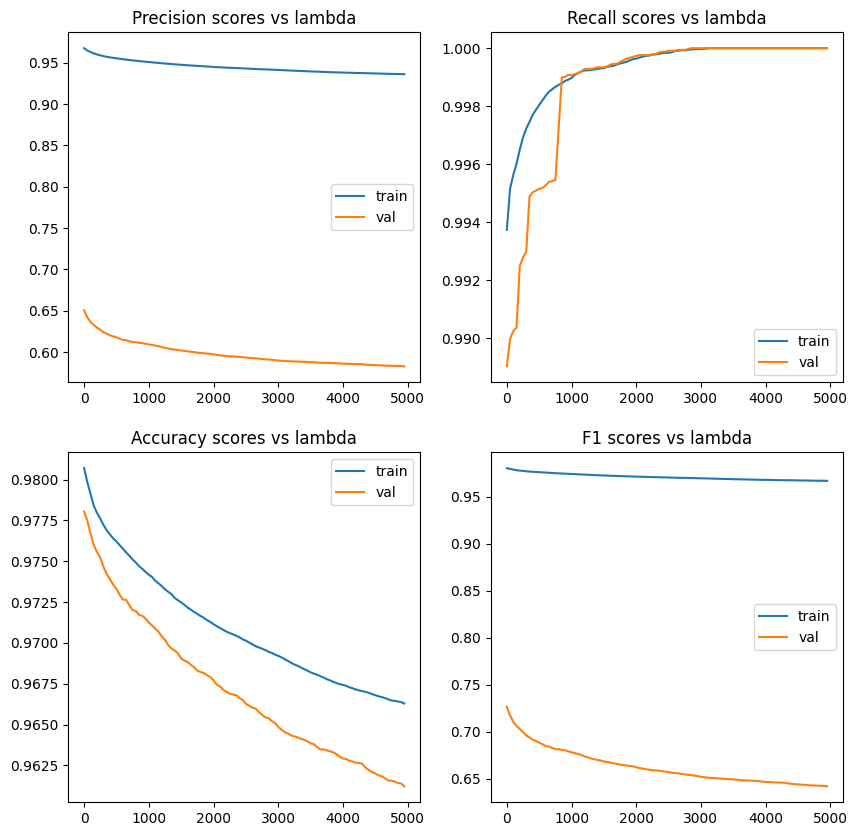

In [62]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.arange(0.01,l,50.0), train_precision_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_precision_scores, label='val')
plt.legend()
plt.title('Precision scores vs lambda')

plt.subplot(2,2,2)
plt.plot(np.arange(0.01,l,50.0), train_recall_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_recall_scores, label='val')
plt.legend()
plt.title('Recall scores vs lambda')

plt.subplot(2,2,3)
plt.plot(np.arange(0.01,l,50.0), train_accuracy_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_accuracy_scores, label='val')
plt.legend()
plt.title('Accuracy scores vs lambda')

plt.subplot(2,2,4)
plt.plot(np.arange(0.01,l,50.0), train_f1_scores, label='train')
plt.plot(np.arange(0.01,l,50.0), val_f1_scores, label='val')
plt.legend()
plt.title('F1 scores vs lambda')

plt.show()

As we can see from above plots, metrics are achieving maximum values when value of lambda is nearing zero. So we will create a model with lambda value 0.001(C=1/0.001=1000), and evaluate the performance.

In [63]:
lr=LogisticRegression(C=100)

lr.fit(X_train_res, y_train_res)

LogisticRegression(C=100)

In [64]:
print('Performance on train data')

y_pred = lr.predict(X_train_res)

print(classification_report(y_train_res, y_pred))

Performance on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17004
           1       0.97      0.99      0.98     17004

    accuracy                           0.98     34008
   macro avg       0.98      0.98      0.98     34008
weighted avg       0.98      0.98      0.98     34008



In [65]:
print('Performance on test data')

y_pred = lr.predict(X_test_scl)

print(classification_report(y_test, y_pred))

Performance on test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11738
           1       0.66      0.28      0.39      1358

    accuracy                           0.91     13096
   macro avg       0.79      0.63      0.67     13096
weighted avg       0.89      0.91      0.89     13096



Since the model is not performing well on test data even after hyperparameter tuning, we will go for ensemble learning and see if the trends are being learnt by them.

### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(random_state=42, max_depth=7, n_estimators=50)

rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

In [68]:
rfc.score(X_train_res, y_train_res)

0.9884144907080686

In [69]:
rfc.score(X_test_scl, y_test)

0.9097434331093464

In [70]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve, auc, classification_report, accuracy_score

In [71]:
y_pred = rfc.predict(X_test_scl)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.68      0.25      0.36      1358

    accuracy                           0.91     13096
   macro avg       0.80      0.62      0.66     13096
weighted avg       0.89      0.91      0.89     13096



### Hyperparameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score, recall_score, precision_score

# def out(grid, X_train_res, y_train_res, X_test_scl, y_test):
#   print('Best parameters, ', grid.best_params_)
#   print('Cross validation recall score, ', grid.best_score_)
#   print('Train recall: ',grid.score(X_train_res, y_train_res), ', Test recall: ', grid.score(X_test_scl, y_test))
#   y_pred_train = grid.predict(X_train_res)
#   y_pred_test = grid.predict(X_test_scl)
#   print('Train accuracy: ',accuracy_score(y_train_res, y_pred_train), ', Test accuracy: ', accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV

def out(grid, X_train_res, y_train_res, X_test, y_test):
  print('Best parameters, ', grid.best_params_)
  print('Cross validation recall score, ', grid.best_score_)

  kfold=KFold(n_splits=3)
  para =grid.best_params_
  model = RandomForestClassifier(random_state = 420, n_estimators = para.get('n_estimators'), max_depth = para.get('max_depth'), criterion = para.get('criterion'), max_features = para.get('max_features'))
  cv_f1_results = cross_validate(model, X_train_res, y_train_res, cv = kfold, scoring='recall', return_train_score = True)

  print(f"Train recall= {cv_f1_results['train_score'].mean()*100}, Validation recall= {cv_f1_results['test_score'].mean()*100}")

  model.fit(X_train_res, y_train_res)
  y_pred = model.predict(X_test_scl)
  print(classification_report(y_test, y_pred))

In [ ]:
params = {'n_estimators':[30,40,50],
          'max_depth':[5,6,7],
          'criterion':['gini', 'entropy'],
          'max_features':[4,5,6]
          }

grid=GridSearchCV(estimator=RandomForestClassifier(random_state=420),
                  param_grid=params,
                  scoring='recall',
                  cv=3,
                  n_jobs=-1)

grid.fit(X_train_res, y_train_res)

out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'n_estimators': 50}
Cross validation recall score,  1.0
Train recall= 99.87061867795813, Validation recall= 99.83239237826393
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11738
           1       0.66      0.26      0.38      1358

    accuracy                           0.91     13096
   macro avg       0.79      0.62      0.66     13096
weighted avg       0.89      0.91      0.89     13096



Even though the model is performing well on the train and validation data, it's performing very poorly on the test data. We will try xgboost to see if the results can be improved with xgboost algorithm.

## xgboost

## Model fitting

In [84]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=420)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_scl)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.69      0.26      0.38      1358

    accuracy                           0.91     13096
   macro avg       0.81      0.62      0.67     13096
weighted avg       0.90      0.91      0.89     13096



### Hyperparameter tuning

In [77]:
def xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test):
  print('Best parameters, ', grid.best_params_)
  print('Cross validation recall score, ', grid.best_score_)

  kfold= KFold(n_splits=3)
  para = grid.best_params_
  model = XGBClassifier(random_state = 420, n_estimators = para.get('n_estimators'), max_depth = para.get('max_depth'), learning_rate = para.get('learning_rate'))
  cv_f1_results = cross_validate(model, X_train_res, y_train_res, cv = kfold, scoring='f1', return_train_score = True)

  print(f"Train recall= {cv_f1_results['train_score'].mean()*100}, Validation recall= {cv_f1_results['test_score'].mean()*100}")

  model.fit(X_train_res, y_train_res)
  y_pred = model.predict(X_test_scl)
  print(classification_report(y_test, y_pred))

In [78]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params={
    'n_estimators' : [10,15,20],
    'max_depth': [3,4,5],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
Cross validation recall score,  0.9843165943302558
Train recall= 98.60583951595872, Validation recall= 81.34289301301865
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11738
           1       0.67      0.27      0.38      1358

    accuracy                           0.91     13096
   macro avg       0.80      0.63      0.67     13096
weighted avg       0.89      0.91      0.89     13096



In [79]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params={
    'n_estimators' : [20,30,40],
    'max_depth': [5,6,8],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 40}
Cross validation recall score,  0.9898956492245542
Train recall= 99.58599236511344, Validation recall= 84.37923004132038
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.71      0.23      0.35      1358

    accuracy                           0.91     13096
   macro avg       0.81      0.61      0.65     13096
weighted avg       0.90      0.91      0.89     13096



In [80]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params={
    'n_estimators' : [40,70,100],
    'max_depth': [8,9,10],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Cross validation recall score,  0.9921232300968931
Train recall= 100.0, Validation recall= 85.76933906205191
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.72      0.25      0.37      1358

    accuracy                           0.91     13096
   macro avg       0.82      0.62      0.66     13096
weighted avg       0.90      0.91      0.89     13096



In [82]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params={
    'n_estimators' : [200,250,300],
    'max_depth': [10],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}
Cross validation recall score,  0.9931384717310153
Train recall= 100.0, Validation recall= 86.53476981075664
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.71      0.25      0.37      1358

    accuracy                           0.91     13096
   macro avg       0.82      0.62      0.66     13096
weighted avg       0.90      0.91      0.89     13096



In [83]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params={
    'n_estimators' : [240,250,260],
    'max_depth': [10],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res, X_test_scl, y_test)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 260}
Cross validation recall score,  0.9931673974471176
Train recall= 100.0, Validation recall= 86.56791105628156
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11738
           1       0.71      0.25      0.37      1358

    accuracy                           0.91     13096
   macro avg       0.82      0.62      0.66     13096
weighted avg       0.90      0.91      0.89     13096



We can see that validation performance is not increasing significantly from here on. Also, similar to Random Forest, xgboost is also performing very well on the train and validation data. But it's performance on test data is very poor. We will need to investigate this phenomenon with respect to charactersistics of train and test data.

## Summary on classification models

Every model is performing equally and exceptionally well on the train data, but is performing very poorly on the test data. This indicates that normal classification algorithms might not be the solution for this problem.

### Checking the characteristics of train and test data

In [92]:
#95 percent condifence interval of max life of train data

train_maxlife = df_train_copy.groupby('Sl no.')['max_life'].first()

std_error = train_maxlife.std()/np.sqrt(len(train_maxlife))

mean_maxlife = train_maxlife.mean()

print(f'95 percent confidence interval for max life in train data is ({mean_maxlife - 2*std_error} , {mean_maxlife + 2*std_error})')

95 percent confidence interval for max life in train data is (197.04145015864853 , 215.57854984135147)


In [127]:
#95 percent condifence interval of max life of test data

train_maxlife = df_test_copy.groupby('Sl no.')['max_life'].first()

std_error = train_maxlife.std()/np.sqrt(len(train_maxlife))

mean_maxlife = train_maxlife.mean()

print(f'95 percent confidence interval for max life in test data is ({mean_maxlife - 2*std_error} , {mean_maxlife + 2*std_error})')

95 percent confidence interval for max life in test data is (120.24130416496297 , 141.67869583503705)


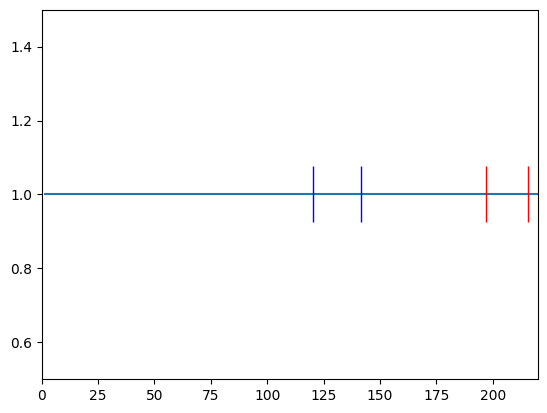

In [135]:
from matplotlib import pyplot as plt
import numpy as np

a = [197.04145015864853 , 215.57854984135147]
b= [120.24130416496297 , 141.67869583503705]

plt.hlines(1,1,220)
plt.xlim(0,220)
plt.ylim(0.5,1.5)

y = np.ones(np.shape(a))
plt.plot(a,y,'|',ms = 40, color='red')
plt.plot(b,y,'|',ms = 40, color='blue')
plt.show()



We can see from the above plot and condifence intervals that 95 percent confidence intervals of max life in train and test data do not even overlap. In fact they are separated my a considerable margin. This could be the reason for models performing very well on the train data and very poor on the test data.

## Regression models

Since classification models are not performing well on the test data, we will try regression algorithms. Our target variable will be RUL.

In [51]:
df_train_copy

,Sl no.,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL,max_life,target
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


In [52]:
df_train_copy.drop(['Sl no.', 'max_life', 'target'], axis=1, inplace=True)
df_test_copy.drop(['Sl no.', 'max_life', 'target'], axis=1, inplace=True)

In [53]:
df_train_copy.head()

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


### Removal of outliers

In [54]:
col = list(df_train_copy.columns)

In [55]:
col

['cycles',
 'parameter 1',
 'parameter 2',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 17',
 'sensor 20',
 'sensor 21',
 'RUL']

In [56]:
for i in col:
  lv=df_train_copy[i].quantile(0.25)
  uv=df_train_copy[i].quantile(0.75)
  iqr=uv-lv
  df_train_copy = df_train_copy[(df_train_copy[i]>lv-1.5*iqr) & (df_train_copy[i]<uv+1.5*iqr)]

### Splitting of features and target

In [57]:
X_train=df_train_copy.drop(['RUL'], axis=1)
y_train=df_train_copy['RUL']

X_test=df_test_copy.drop(['RUL'], axis=1)
y_test=df_test_copy['RUL']

In [58]:
X_train

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20610,180,-0.0010,0.0001,643.64,1595.98,1416.45,552.05,2388.24,9062.98,47.77,520.80,2388.22,8138.98,8.5150,395,38.54,23.2345
20613,183,-0.0011,-0.0002,643.34,1594.60,1427.27,551.83,2388.20,9066.08,48.00,520.64,2388.23,8144.21,8.5006,395,38.49,23.0709
20614,184,0.0027,-0.0004,642.91,1598.88,1420.89,551.72,2388.25,9064.14,47.98,520.05,2388.20,8142.28,8.4989,396,38.44,23.1229
20615,185,-0.0014,0.0004,643.95,1600.81,1420.34,551.92,2388.19,9069.95,47.75,520.71,2388.20,8142.32,8.4804,395,38.60,23.2127


### Scaling features using StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col = X_train.columns

In [60]:
X_train_scl = pd.DataFrame(scaler.fit_transform(X_train), columns=col)

In [61]:
X_train_scl.describe()

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
count,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04,1.711400e+04
mean,-7.473279e-17,3.155384e-17,-2.657166e-17,-1.656162e-15,1.201952e-15,1.920550e-14,-7.957630e-14,2.613535e-12,-1.553047e-13,-1.324680e-14,-2.053815e-13,3.585558e-12,-6.157400e-14,1.486726e-14,-6.141374e-15,3.214631e-14,-2.155211e-14
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.555233e+00,-2.755699e+00,-2.052638e+00,-2.954512e+00,-2.874795e+00,-2.957050e+00,-3.190803e+00,-3.011654e+00,-2.730189e+00,-2.783772e+00,-2.936116e+00,-2.815273e+00,-2.702441e+00,-2.815265e+00,-2.240747e+00,-2.761893e+00,-2.778264e+00
25%,-8.048842e-01,-6.971132e-01,-9.447090e-01,-7.004740e-01,-6.890503e-01,-7.229985e-01,-6.857210e-01,-7.397403e-01,-6.847765e-01,-7.412511e-01,-6.634107e-01,-7.226977e-01,-6.781352e-01,-7.093923e-01,-6.832722e-01,-6.991697e-01,-6.806314e-01
50%,-8.788415e-02,4.677511e-03,-7.230754e-03,-1.956676e-02,-1.356108e-02,-2.605067e-02,1.841017e-02,7.165751e-02,-2.688973e-02,-4.493721e-02,2.828213e-02,-7.882829e-02,9.095567e-03,-3.343325e-02,9.546518e-02,3.276429e-02,1.820551e-02
75%,6.624647e-01,7.064683e-01,1.015473e+00,6.613404e-01,6.657662e-01,6.763527e-01,7.225414e-01,7.207758e-01,6.067689e-01,6.513767e-01,7.364438e-01,7.260085e-01,6.540072e-01,6.815234e-01,8.742026e-01,6.981588e-01,7.055447e-01
max,3.613837e+00,2.765054e+00,2.038176e+00,3.314531e+00,3.250664e+00,3.363216e+00,2.929722e+00,3.154969e+00,3.064992e+00,2.879581e+00,2.860929e+00,2.818584e+00,2.697785e+00,2.839393e+00,2.431677e+00,2.760882e+00,2.796727e+00


In [62]:
X_test_scl = pd.DataFrame(scaler.transform(X_test), columns=col)

In [63]:
X_test_scl.describe()

,cycles,parameter 1,parameter 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,-0.290703,-0.000553,0.007216,-0.242416,-0.222885,-0.291278,0.272335,-0.237251,-0.138958,-0.294662,0.288035,-0.223301,-0.066942,-0.259491,-0.238127,0.249028,0.250882
std,0.884707,1.030549,1.002354,0.941294,0.960130,0.912212,0.922528,0.932163,1.065689,0.909466,0.921642,0.916457,1.058092,0.942746,0.960632,0.942736,0.943601
min,-1.555233,-3.831779,-2.052638,-3.400623,-3.880353,-3.066162,-3.624115,-3.173934,-3.295823,-3.155139,-3.611340,-3.137208,-3.228963,-3.283236,-3.019485,-3.626906,-4.239876
25%,-1.021652,-0.697113,-0.689033,-0.894180,-0.894384,-0.943949,-0.333655,-0.902020,-0.827350,-0.973356,-0.317564,-0.883665,-0.756283,-0.917380,-0.683272,-0.366472,-0.356452
50%,-0.421373,0.004678,-0.007231,-0.277842,-0.243842,-0.331562,0.329853,-0.252902,-0.240284,-0.323463,0.341191,-0.239796,-0.124872,-0.290168,0.095465,0.298922,0.289664
75%,0.312302,0.706468,1.015473,0.379586,0.403342,0.297191,0.925656,0.396217,0.392443,0.280009,0.950539,0.404074,0.495116,0.340294,0.095465,0.897777,0.899884
max,3.480441,3.653989,2.379077,4.042397,3.509729,3.612808,3.092214,3.479528,8.864832,3.622316,3.602028,3.784388,8.400217,3.495853,3.210415,3.692434,3.685136


### Hypothesis testing for feature extraction

We will use spearman correlation test to see if our features are heloping to predict our target variable which is RUL. If not, we will be dropping those features.

In [64]:
from scipy.stats import spearmanr

In [65]:
#Ho: RUL is not correlated with the feature
#Ha: There is correlation between RUL and the feature

col = X_train_scl.columns

alpha = 0.05

signi = []
insigni = []
for i in col:
  corr_coef, p_value = spearmanr(X_train_scl[i], y_train)
  if p_value<alpha:
    signi.append(i)
  else:
    insigni.append(i)

In [66]:
signi

['cycles',
 'sensor 2',
 'sensor 3',
 'sensor 4',
 'sensor 7',
 'sensor 8',
 'sensor 9',
 'sensor 11',
 'sensor 12',
 'sensor 13',
 'sensor 14',
 'sensor 15',
 'sensor 17',
 'sensor 20',
 'sensor 21']

In [67]:
insigni

['parameter 1', 'parameter 2']

From spearman correlation test it's clear that parameter 1 and parameter 2 are not helping us to preduct the target variable in linear regression. So we will dropping these features.

In [68]:
X_train_scl.drop(insigni, axis=1, inplace=True)
X_test_scl.drop(insigni, axis=1, inplace=True)

## Linear Regression

In [69]:
#Base model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scl, y_train)

LinearRegression()

In [70]:
model.score(X_train_scl, y_train)

0.5615678576310967

In [71]:
model.score(X_test_scl, y_test)

-1.0835548163815854

### Removing the features with multicollinearity

In [72]:
!pip install statsmodels

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [74]:
deleted_cols = []

def VIF(X_train_scl):
  vif = pd.DataFrame()
  vif['Features'] = X_train_scl.columns
  vif['VIF'] = [variance_inflation_factor(X_train_scl.values, i) for i in range(X_train_scl.shape[1])]
  vif['VIF'] = vif['VIF'].round(2)
  vif = vif.sort_values(by='VIF', ascending=False).reset_index()
  vif.drop('index', axis=1, inplace=True)
  print('*'*15)
  print(vif)
  print('*'*15)
  if vif['VIF'][0]>5:
    deleted_cols.append(vif['Features'][0])
    X_train_scl.drop(vif['Features'][0], axis=1, inplace=True)
    VIF(X_train_scl)
  return X_train_scl, deleted_cols

X_train_scl, deleted_cols = VIF(X_train_scl)

X_test_scl.drop(deleted_cols,axis=1,inplace=True)
print("Removed Features : " , len(deleted_cols))

***************
     Features   VIF
0   sensor 14  4.96
1    sensor 9  4.49
2   sensor 11  3.99
3    sensor 8  3.80
4   sensor 13  3.76
5   sensor 12  3.65
6    sensor 4  3.06
7    sensor 7  3.05
8   sensor 15  2.28
9   sensor 20  2.17
10  sensor 21  2.17
11   sensor 2  1.92
12  sensor 17  1.82
13     cycles  1.81
14   sensor 3  1.68
***************
Removed Features :  0


In [75]:
def adj_R2(X, r2):
  n = X.shape[0]
  d = X.shape[1]

  return 1-((1-r2)*(n-1))/(n-d-1)

from sklearn.metrics import r2_score

## Ridge regression

In [76]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold, cross_validate

In [77]:
model = Ridge()

cross_r2 = cross_validate(model, X_train_scl, y_train, cv=5, scoring = 'r2', return_train_score=True)

print(f"Mean r2 score for train data: {cross_r2['train_score'].mean()}")
print(f"Mean r2 score for validation data: {cross_r2['test_score'].mean()}")

Mean r2 score for train data: 0.5661975593130066
Mean r2 score for validation data: 0.5332192951295969


In [78]:
#Model performance on the test data

model = Ridge()

model.fit(X_train_scl, y_train)

print(f"Train r2 score: {model.score(X_train_scl , y_train)}")

print(f"Test r2 score: {model.score(X_test_scl , y_test)}")

Train r2 score: 0.5615678569470703
Test r2 score: -1.0835458183130693


## Hyperparameter tuning(Ridge)

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
poly=PolynomialFeatures()
scaler = StandardScaler()
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree),scaler, Ridge())

model=polynomial_regression()

param={'ridge__alpha':[1,10,50,100],
           'polynomialfeatures__degree':np.arange(2,5)}

scoring='r2'

c = GridSearchCV(model,param,cv=3,scoring=scoring)
c.fit(X_train_scl,y_train)
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'polynomialfeatures__degree': 2, 'ridge__alpha': 100}
The score is : 0.5963099177885491


### Ridge - tuned model

In [89]:
ridge = make_pipeline(PolynomialFeatures(2), scaler, Ridge(alpha=100))

cross_val_r2 = cross_validate(ridge, X_train_scl, y_train, cv=3, scoring='r2', return_train_score=True)

In [90]:
print(f"Mean r2 score for train data: {cross_val_r2['train_score'].mean()}")
print(f"Mean r2 score for validation data: {cross_val_r2['test_score'].mean()}")

Mean r2 score for train data: 0.6373589418746854
Mean r2 score for validation data: 0.5963099177885491


In [92]:
#Performance on test data

ridge.fit(X_train_scl, y_train)

ridge.score(X_test_scl, y_test)

-1.1040932253936253

The model is performing very bad on the test data. We will try Bagging technique now.

### Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
model = RandomForestRegressor()

cross_r2 = cross_validate(model, X_train_scl, y_train, cv=3, scoring='r2', return_train_score=True)

In [95]:
print(f"Mean r2 score for train data: {cross_r2['train_score'].mean()}")
print(f"Mean r2 score for validation data: {cross_r2['test_score'].mean()}")

Mean r2 score for train data: 0.9492409931902092
Mean r2 score for validation data: 0.5794558173505812


From the scores obtained, it's clear that model is overfitted. We will have to hyperparameter tuning to resolve this issue.

### RandomForestRegressor - Hyperparameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [101]:
params = {'n_estimators': [100, 150, 200],
          'max_depth':[6,7,8],
          'max_features':[8,9,10]
}

grid = GridSearchCV(RandomForestRegressor(),
                    param_grid=params,
                    scoring='r2',
                    cv=3)

grid.fit(X_train_scl, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 7, 'max_features': 8, 'n_estimators': 150}
0.5986214729273798


In [103]:
params = {'n_estimators': [160,170,180],
          'max_depth':[7],
          'max_features':[8]
}

grid = GridSearchCV(RandomForestRegressor(),
                    param_grid=params,
                    scoring='r2',
                    cv=3)

grid.fit(X_train_scl, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 7, 'max_features': 8, 'n_estimators': 180}
0.5984561883721425


### RandomForestRegressor - tuned model

In [105]:
model = RandomForestRegressor(n_estimators = 180, max_depth = 7, max_features = 8)

cross_r2 = cross_validate(model, X_train_scl, y_train, cv=3, scoring='r2', return_train_score=True)

print(f"Mean r2 score for train data: {cross_r2['train_score'].mean()}")
print(f"Mean r2 score for validation data: {cross_r2['test_score'].mean()}")

Mean r2 score for train data: 0.682942737662549
Mean r2 score for validation data: 0.5990725247699228


In [109]:
#Performance on test data

model=RandomForestRegressor(n_estimators = 180, max_depth = 7, max_features = 8)

model.fit(X_train_scl, y_train)

model.score(X_test_scl, y_test)

-1.0186963757737777

Similar to linear regression model, random forest regressor is also performing very poorly on the test, whereas performance on the train data is kind of ok. This is the similar trend observed in classification models.

# Summary

* Both classification and regression models are performing very poorly on the test data.
* The reason for bad performance on the test data could be attributed to relatively much different charactersitics of the test data compared to train data.
* When regression and classification models are compared, classification models are performing better on the train data, and also classification model could be easily deployed for making a service indicator in predicitive maintenance and hence machine breakdown can be avoided. This will help in reducing the downtime.